In [ ]:
#import os
#os.chdir(r"C:\Users\GilseungAhn\Google 드라이브\작업\온라인 강의 머신러닝 성능 향상을 위한 데이터 탐색과 전처리 심화\데이터\실습 데이터 - #6\아파트_실거래가_예측")

# 아파트 실거래가 예측
- 목적 : 서울/부산 지역의 아파트 관련 정보를 바탕으로 실거래가를 예측
- 데이터 출처 : 직방


## train.csv 탐색 및 전처리

#### train.csv: 모델 학습용 데이터 / test.csv: 모텔 평가용 데이터
- apartment_id : 아파트 ID
- city, dong, jibun, addr_kr : 아파트 주소 관련 변수 ( 시, 동, 지번, 주소 )
- apt : 아파트 단지 이름
- exclusive_use_area : 전용면적
- year_of_completion : 설립일자
- transaction_year_month, transaction_date : 거래 년월 및 날짜
- floor : 층
- transaction_real_price: 실거래가 (라벨 , train.csv 에만 존재)


#### park.csv : 서울/부산 지역의 공원에 대한 정보
- apartment_id : 아파트 ID
- city, gu, dong : 아파트 주소 관련 변수(시, 구, 동)
- park_name : 공원 이름
- park_type, park_area : 공원 유형, 공원 면적
- park_exercise_facility ~ park_facility_other : 공원에 있는 시설
- park_open_year : 공원 개장년도
- reference_date : 데이터 기록 일자


#### day_care_center.csv : 서울/부산 지역의 어린이집에 대한 정보
- city, gu: 어린이집 주소 관련 변수(시,구)
- day_care_name: 어린이집 이름
- day_care_type: 어린이집 종류
- day_care_baby_num ~ CCTV_num: 어린이집의 시설 정보
- reference_date : 데이터 기록 일자

#### 한국행적구역분류.xlsx
- day_care_center에는 동 정보가 없고, train.csv에는 구 정보가 없기 때문에 직접 수집함.

In [1]:
import pandas as pd
df = pd.read_csv("sampled_train.csv", engine = "python", encoding = "utf8")
df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,10923,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,84.88,2002,201601,1~10,3,52000
1,10924,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,84.88,2002,201601,1~10,10,58000
2,10927,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,114.88,2002,201601,1~10,11,91500
3,10928,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,114.88,2002,201601,11~20,13,72000
4,10930,1878,서울특별시,신당동,844,남산타운,신당동 844 남산타운,84.88,2002,201601,11~20,6,68300


### 구 변수 추가

- 시와 동만 있는 데이터와 구만 있는 데이터의 병합이 어렵기 때문에 한국행정구역분류.xlsx 데이터를 활용하여 시와 동을 기준으로 데이터를 병합하는 방식으로 구 변수를 부착한다.

In [2]:
# 참조 데이터 불러오기
ref_df = pd.read_excel("한국행정구역분류.xlsx",
                       sheet_name = "법정동코드 연계 자료분석용",
                       header = 1)

ref_df.head()

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,행정기관코드,행정기관 생성일,법정동코드,관할지역,행정동 영문명칭,비고
0,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,11.0,1100000000,19880423,1100000000,NaN,Seoul,NaN
1,서울특별시,종로구,종로구,종로구,종로구,11010.0,1111000000,19880423,1111000000,NaN,Jongno-gu,NaN
2,서울특별시,종로구,청운효자동,청운효자동,청운동,1101072.0,1111051500,20081101,1111010100,NaN,Cheongunhyoja-dong,NaN
3,서울특별시,종로구,청운효자동,청운효자동,신교동,1101072.0,1111051500,20081101,1111010200,NaN,Cheongunhyoja-dong,NaN
4,서울특별시,종로구,청운효자동,청운효자동,궁정동,1101072.0,1111051500,20081101,1111010300,NaN,Cheongunhyoja-dong,NaN


#### 변수 부착시에 자주 발생하는 이슈 및 해결 방안
- 데이터에 있는 키의 상태 공간이 참조 데이터에 있는 키의 상태 공간에 완전히 포함되지 않아서, 병합을 했을 때 데이터 크기가 줄어드는 경우가 존재
- 따라서 키 변수의 상태 공간이 겹쳐지는지를 np.isin 함수를 사용하여 확인해야 함.

In [3]:
# ref_df 필터링
ref_df = ref_df.loc[ref_df['시도'].isin(['서울특별시', '부산광역시'])] # 서울특별시와 부산광역시 레코드만 가져옴
ref_df = ref_df[['시도', '시군구', '법정동']]
ref_df.head()

,시도,시군구,법정동
0,서울특별시,서울특별시,서울특별시
1,서울특별시,종로구,종로구
2,서울특별시,종로구,청운동
3,서울특별시,종로구,신교동
4,서울특별시,종로구,궁정동


In [4]:
# ref_df에 포함되어 있는 시도-읍면동과 df에 포함되어 있는 시도-읍면동이 일치하지 않는 경우를 확인해야 함
ref_df_loc = ref_df['시도'] + '-' + ref_df['법정동']
df_loc = (df['city'] + '-' + df['dong']).unique()

In [5]:
import numpy as np
np.isin(df_loc, ref_df_loc) # df_loc가 ref_df_loc에 포함되지 않는 경우가 다수 있음을 확인

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False])

In [6]:
# 포함되지 않는 동 목록 확인: 전부 부산광역시이며 읍 단위인 경우에 이러한 문제가 발생함을 확인
df_loc[~np.isin(df_loc, ref_df_loc)]

array(['부산광역시-정관읍 용수리'], dtype=object)

In [7]:
# 장안읍 예시: 
ref_df.loc[ref_df['법정동'].str.contains('장안')]

,시도,시군구,법정동
275,서울특별시,동대문구,장안동
276,서울특별시,동대문구,장안동
1086,부산광역시,기장군,장안읍
1091,부산광역시,기장군,장안리


In [8]:
# 시도와 법정동이 완전히 똑같은 행이 있어, 이를 제거함
ref_df = ref_df.drop_duplicates(subset = ['시도', '법정동'])

In [9]:
# 결론: df의 dong에 리가 붙어있으면 제거해야 함
df['dong'] = df['dong'].str.split(' ', expand = True).iloc[:, 0]

# 재확인: 정상적으로 작동함을 확인
df_loc = (df['city'] + '-' + df['dong']).unique()
df_loc[~np.isin(df_loc, ref_df_loc)]

array([], dtype=object)

In [10]:
# df와 ref_df 병합
df = pd.merge(df, ref_df, left_on = ['city', 'dong'], right_on = ['시도', '법정동'])

# ref_df에 있던 불필요한 변수 제거
df.drop(['시도', '법정동'], axis = 1, inplace = True)

#### 불필요한 변수 제거
- 사용하지 않는 변수인 transaction_id 와 addr_kr 변수는 미리 삭제하여, 메모리 부담을 줄인다.
- 모델에 직접 사용되진 않는 다른 변수(apartment_id 등)는 조건부 통계를 사용하여 부착할 예정


In [11]:
df.drop(['transaction_id', 'addr_kr'], axis = 1, inplace = True) # transaction_id는 인덱스와 동일하므로 삭제해도 무방

In [12]:
# apartment_id는 id지만 어느정도 사용이 가능할 것이라 보임 (완전히 유니크하지 않으므로)
df['apartment_id'].value_counts().head(10)

10939    1031
703       947
4080      685
9436      656
4018      632
8031      601
729       595
2944      590
6467      570
12432     526
Name: apartment_id, dtype: int64

#### 시간 관련 변수 추출 및 변환
- 아파트가 건축된지 얼마나 되었는지를 나타내는 변수 age를 브로드캐스팅 개념을 활용하여 생ㅅ어
- transaction_year_month 변수의 타입을 string으로 바꾼 후, str accessor를 사용하여 연도를 추출


In [13]:
# 건축된지 얼마나 되었는지를 나타내는 변수로 변환
df['age'] = 2018 - df['year_of_completion']
df.drop('year_of_completion', axis = 1, inplace = True)

In [14]:
# 거래 년도 추출
# str accessor를 사용하기 위해, 타입 변경
df['transaction_year_month'] = df['transaction_year_month'].astype(str)

df['transaction_year'] = df['transaction_year_month'].str[:4].astype(int)
df['transaction_month'] = df['transaction_year_month'].str[4:].astype(int)
df.drop('transaction_year_month', axis = 1, inplace = True)

In [15]:
# 도시가 둘 뿐이므로 서울특별시인지 나타내는 이진 변수 생성
df['Seoul'] = (df['city'] == "서울특별시").astype(int)

#### fllor 변수 범주 변수 구간화 : 2층과 3층의 가격 차이가 있을까??
- 아파트의 층을 나타내는 floor 변수는 이론적으로는 연속형 변수이지만, 범주형 변수로 간주하는 것이 적절함(2층과 3층 아파트의 가격 차이가 있을까?)
- 다만 범주형 변수라고 하기에는 상태 공간의 크기가 커서 그룹화를 해야 함
- 층에 따른 실거래가 평균을 나타내는 그래프를 통해 그룹 기준을 확인
1. 상태 공간의 크기가 작으면 박스 플롯을 그리는 것이 더 바람직함
2. 정교한 차이를 검정하고 싶으면, 일원분산분석의 사후 검정을 통해 군집화를 하는 것이 좋음


- 그룹 기준을 확인한 뒤, 변수를 구간화하여 각 구간에 속하는 데이터에 대해, 층에 따른 실거래가의 박스플롯을 그려서 군집을 세분화함.(따라서 이전 단계에서 그룹화를 할 때, 여유있게 나누는 것이 좋음)

<AxesSubplot:xlabel='floor'>

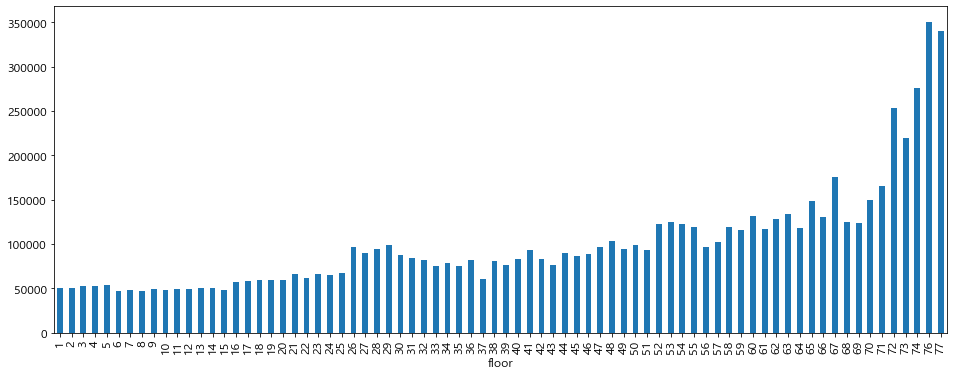

In [16]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (16, 6)

# 대략적인 구간 확인: 1층 이하, 1 ~ 25층, 26층 ~ 49층, 50층 이상
df.groupby(['floor'])['transaction_real_price'].mean().plot(kind = 'bar')

In [17]:
# 층 수준을 생성한 뒤, 차이를 봄
def floor_level_converter(x):
    if x <= 15:
        return "low"
    elif x <= 25:
        return "middle"
    elif x <= 51:
        return "high"    
    else:
        return "very_high"
    
df['floor_level'] = df['floor'].apply(floor_level_converter)

<AxesSubplot:title={'center':'transaction_real_price'}, xlabel='floor'>

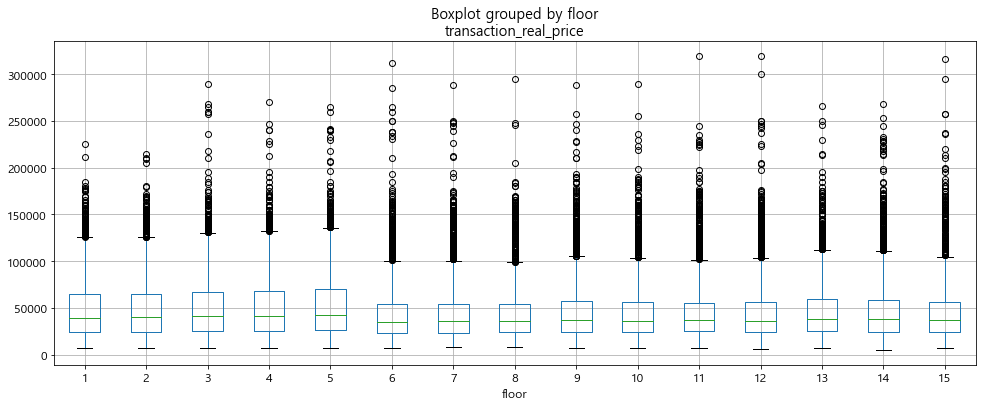

In [18]:
# 저층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층에 따른 차이가 크지 않음
df.loc[df['floor_level'] == 'low'].boxplot(column = 'transaction_real_price', by = 'floor')

<AxesSubplot:title={'center':'transaction_real_price'}, xlabel='floor'>

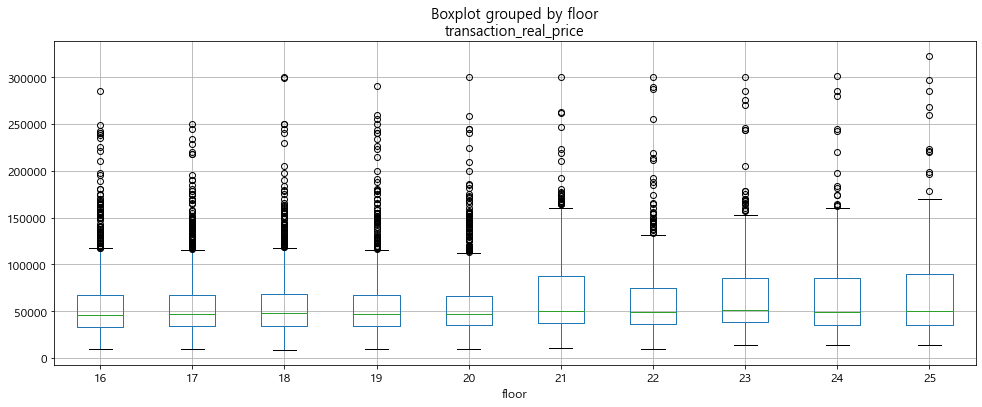

In [19]:
# 중층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층에 따른 차이가 크지 않음
df.loc[df['floor_level'] == 'middle'].boxplot(column = 'transaction_real_price', by = 'floor')

<AxesSubplot:title={'center':'transaction_real_price'}, xlabel='floor'>

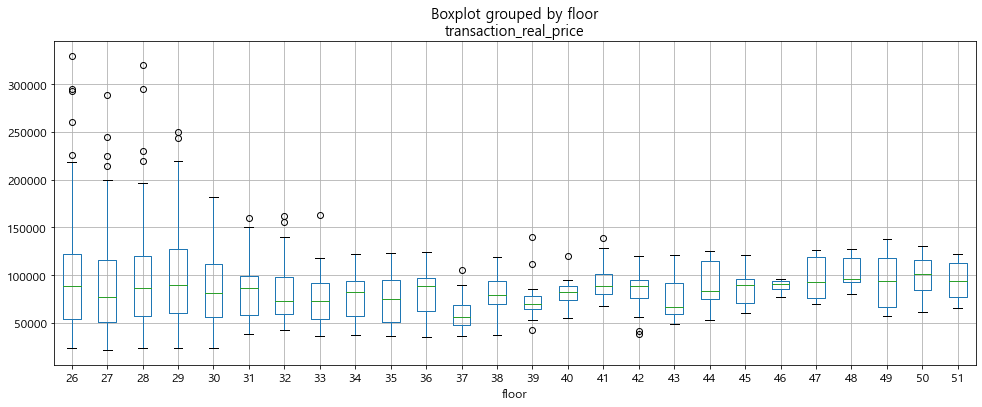

In [20]:
# 고층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층에 따른 차이가 크지 않음
df.loc[df['floor_level'] == 'high'].boxplot(column = 'transaction_real_price', by = 'floor')

<AxesSubplot:title={'center':'transaction_real_price'}, xlabel='floor'>

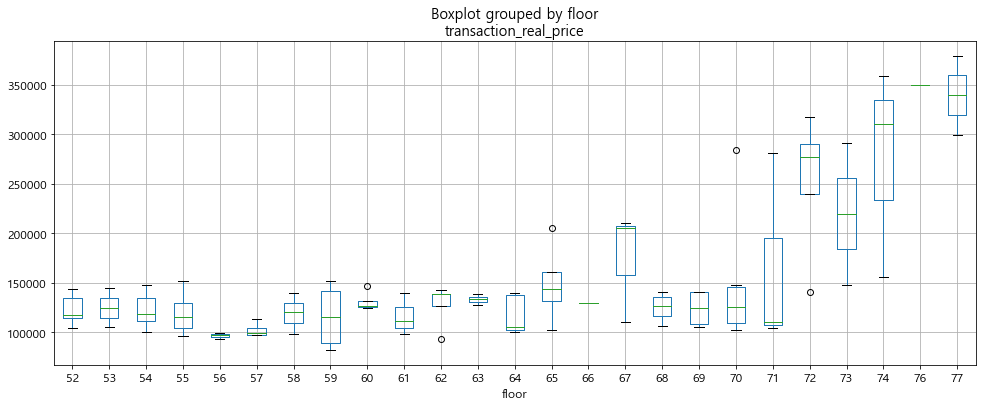

In [21]:
# 초고층 그룹에 아파트의 층에 따른 가격 분포 확인 => 층이 높으면 높을수록 가격이 더 오름 (단, 72층을 기준으로 그런 현상이 두드러짐)
df.loc[df['floor_level'] == 'very_high'].boxplot(column = 'transaction_real_price', by = 'floor')

# 결론: floor_level 변수는 유의하나, floor 변수는 초고층에서만 유의
# 따라서 very high를 세분화하거나, floor_level 변수와 floor 변수를 같이 사용하고 교호작용을 고려할 수 있는 트리 계열의 모델 사용이 적합
# 여기서는 very high를 세분화하기로 결정

In [22]:
# 층 수준을 생성한 뒤, 차이를 봄
def floor_level_converter(x):
    if x <= 15:
        return "low"
    elif x <= 25:
        return "middle"
    elif x <= 51:
        return "high"    
    elif x <= 71: # 새로운 조건 추가
        return "very_high"    
    else:
        return "very_very_high"   

df['floor_level'] = df['floor'].apply(floor_level_converter)
df.drop('floor', axis = 1, inplace = True)

#### 시세 변수 추가
- grouby 를 이용하여 city 변수와 시군구 변수에 따른 transaction_real_price의 평균을 구한 뒤, 이를 데이터에 부착하는 방식으로 구별_전체_평균_시세 변수를 추가함

- city, 시군구, transaction_year 에 따른 transaction_real_price 의 평균과 개수(count)를 구하여, 이를 데이터에 부착하는 방식으로 구별_작년_평균_시세 와 구별_작년_거래량 변수를 추가함

- apartment_id 에 따른 transaction_real_price의 평균을 구한 뒤, 이를 데이터에 부착하는 방식으로 아파트별_평균가격 변수를 추가함.

In [23]:
# 구별 전체 평균 시세 부착
mean_price_per_gu = df.groupby(['city', '시군구'], as_index = False)['transaction_real_price'].mean()
mean_price_per_gu.rename({'transaction_real_price':'구별_전체_평균_시세'}, axis = 1, inplace = True)
df = pd.merge(df, mean_price_per_gu, on = ['city', '시군구']) 

In [24]:
# 구별 작년 시세 부착
# price_per_gu_and_year 변수에 직접 수정을 하므로, df가 변경되는 것을 방지하기 위해, df.copy().groupby~를 사용
price_per_gu_and_year = df.copy().groupby(['city', '시군구', 'transaction_year'], as_index = False)['transaction_real_price'].agg(['mean', 'count'])
price_per_gu_and_year = price_per_gu_and_year.reset_index().rename({"mean":"구별_작년_평균_시세", "count":"구별_작년_거래량"}, axis = 1)

price_per_gu_and_year['transaction_year'] += 1 # 작년것을 붙이기 위해, 1을 더함
df = pd.merge(df, price_per_gu_and_year, on = ['city', '시군구', 'transaction_year'], how = 'left') # 작년 기록이 없어서 붙지 않는 것을 방지하기 위해, how = 'left'로 설정
df['구별_작년_거래량'].fillna(0, inplace = True) # 구별 작년 거래 데이터가 없다는 것은, 구별 작년 거래량이 0이라는 이야기이므로 fillna(0)을 수행

In [25]:
# 아파트별 평균 시세 부착
price_per_aid = df.copy().groupby(['apartment_id'], as_index = False)['transaction_real_price'].mean()
price_per_aid.rename({"transaction_real_price":"아파트별_평균가격"}, axis = 1, inplace = True)

df = pd.merge(df, price_per_aid, on = ['apartment_id'])

## 외부 데이터 부착

#### 공원 데이터 추가
- 공원 데이터를 park_df 라고 불러옴
- park_df 의 park_exercise_facility 를 확인해보니, 너무 다양한 종류의 값이 있어 더미화를 하기에는 무리가 있음. 따라서 해당 변수를 결측인지 아닌지만 나타내는 변수로 변환
- 동별로 유형에 따른 공원 수를 계산한 뒤, 데이터에 부착함.

#### 어린이집 데이터 추가
- 아래 두 개의 가설을 바탕으로, 구 및 유형별 어린이집 수와 케어 가능한 아이 수의 합계를 계산하여 데이터에 부착함
1. 같은 어린이집이어도 종류가 다르면 아파트 가격에 다르게 영향을 줄 것이다.
2. 아이가 있는 부모라면, 어린이집 수와 케어 가능한 아이의 수 등만 보고 아파트 구매를 결정하지, 각 어린이집에 CCTV 개수가 몇개인지 등까지 파악하지 않을 것이다.


In [26]:
park_df = pd.read_csv("park.csv")
park_df.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


In [27]:
# 모든 값을 고려하는 것은 불가능하고, 그리 좋은 접근이 아닌 것으로 보임
park_df['park_exercise_facility'].unique()

array([nan, '게이트볼장', '풋살운동장', '배드민턴장', '야외헬스형운동기구 1개', '"축구장,배드민턴장"',
       '"배드민턴장,테니스장"', '"다목적운동장,농구장,배드민턴장"', '다목적운동장', '"배드민턴장, 게이트볼장"',
       '"테니스장,배드민턴장,체력단련시설"', 'x-game장', '"축구장, 게이트볼장, 테니스장"', '5', '3',
       '7', '12', '10조12종', '0', '5조9종', '10', '11조14종', '6', '8', '9',
       '4', '5조7종', '3조4종', '5조8종', '2조3종', '2', '11', '6조8종', '4조8종',
       '사격장', '철봉 등 6종', '철봉 2', '운동기구 6종',
       '"배드민턴장, 족구장, 게이트볼장, 농구장 반코트"', '테니스장', '"배드민턴장, 지압보도"',
       '헬스형 운동기구 등', '족구장', '"배드민턴장, 체력단련장"',
       '"운동장, 축구장, 농구장, 배드민턴장, 골프연습장, 체력단련장"',
       '"배드민턴장 2개소, 체력단련시설 6개소 36개"',
       '"배드민턴장 1개소, 농구장 1개소, 체력단련시설 3개소 29개"',
       '"배드민턴장 1개소, 농구정 1개소, 체력단련시설 1개소 7개"', '체력단련시설 1개소 3개', '없음',
       '체력단련시설 1개소 4개', '체력단련시설 1개소 6개', '체력단련시설 1개소 2개', '체력단련시설 1개소 7개',
       '체력단련시설 1개소 5개', '체력단련시설 2개소 5개', '체력단련시설 1개소', '배드민턴장 게이트볼장 족구장',
       '"실내배드민턴장, 구민운동장, 다목적체육관, 골프연습장"', '"배드민턴장, 체력단련기구"', '체력단련기구',
       '"농구장, 체력단련기구"', '"농구장, 배드민턴장, 체력단련기구"',
       '"테니스장, 배드민

In [28]:
park_df.columns

Index(['city', 'gu', 'dong', 'park_name', 'park_type', 'park_area',
       'park_exercise_facility', 'park_entertainment_facility',
       'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other',
       'park_open_year', 'reference_date'],
      dtype='object')

In [29]:
# 따라서 결측을 0으로, 결측이 아니면 1로 변환
facility_cols = ['park_exercise_facility', 'park_entertainment_facility', 'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other']
for col in facility_cols:
    park_df.loc[park_df[col].notnull(), col] = 1
    park_df.loc[park_df[col].isnull(), col] = 0

In [30]:
# 동별 공원 수 
num_park_per_dong = park_df.groupby(['city', 'gu', 'dong'], as_index = False)['park_name'].count()
num_park_per_dong.rename({"park_name":"공원수"}, axis = 1, inplace = True)

# 동별 공원에 배치된 facilty 수
num_facilty_per_dong = park_df.groupby(['city', 'gu', 'dong'], as_index = False)[facility_cols].sum()
num_facilty_per_dong.head()

,city,gu,dong,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other
0,부산광역시,강서구,녹산동,1,0,1,0,1
1,부산광역시,강서구,대저1동,1,0,0,0,1
2,부산광역시,강서구,명지동,13,17,4,0,25
3,부산광역시,강서구,송정동,2,0,2,0,2
4,부산광역시,강서구,신호동,2,3,1,0,3


In [31]:
# 공원 데이터 부착
df = pd.merge(df, num_park_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
df['공원수'].fillna(0, inplace = True)
df.drop('gu', axis = 1, inplace = True)

df = pd.merge(df, num_facilty_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
df[facility_cols].fillna(0, inplace = True)
df.drop('gu', axis = 1, inplace = True)

C:\Users\choiswonspec\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


#### 어린이집 데이터

In [32]:
day_care_center_df = pd.read_csv('day_care_center.csv')
day_care_center_df.head()

# 가설: 같은 어린이집이어도 종류가 다르면 아파트 가격에 다르게 영향을 줄 것이다. 가령, 가정 어린이집보단 국공립어린이집이 더 인기가 좋을 것이다.
# 또한, 아이가 있는 부모라면, 어린이집 수와 케어 가능한 아이의 수 등만 보고 아파트 구매를 결정하지, 각 어린이집에 CCTV 개수가 몇개인지 등까진 파악하지 않을 것이다.
# 따라서 구 및 유형별 어린이집 수와 케어 가능한 아이 수만 집계

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [33]:
# 불필요한 변수 제거
day_care_center_df = day_care_center_df[['city', 'gu', 'day_care_type', 'day_care_baby_num']]

In [34]:
dummy_day_care_type = pd.get_dummies(day_care_center_df['day_care_type'], drop_first = False)
dummy_day_care_type = dummy_day_care_type.add_prefix("어린이집유형_")

day_care_center_df = pd.concat([day_care_center_df, dummy_day_care_type], axis = 1)
day_care_center_df.drop('day_care_type', axis = 1, inplace = True)
day_care_center_df.head()

,city,gu,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
0,서울특별시,서대문구,70,0,1,0,0,0,0,0
1,서울특별시,서대문구,88,0,1,0,0,0,0,0
2,서울특별시,서대문구,90,0,0,0,0,0,1,0
3,서울특별시,서대문구,18,1,0,0,0,0,0,0
4,서울특별시,서대문구,93,0,1,0,0,0,0,0


In [35]:
aggregated_day_care_center_df = day_care_center_df.groupby(['city', 'gu'], as_index = False)[day_care_center_df.columns[2:]].sum()
aggregated_day_care_center_df.head()

,city,gu,day_care_baby_num,어린이집유형_가정,어린이집유형_국공립,어린이집유형_민간,어린이집유형_법인·단체,어린이집유형_사회복지법인,어린이집유형_직장,어린이집유형_협동
0,부산광역시,강서구,5312,71.0,6.0,35.0,0.0,5.0,5.0,1.0
1,부산광역시,금정구,5251,30.0,6.0,58.0,1.0,7.0,3.0,1.0
2,부산광역시,기장군,7689,98.0,13.0,56.0,0.0,5.0,3.0,3.0
3,부산광역시,남구,6676,65.0,12.0,50.0,2.0,6.0,6.0,2.0
4,부산광역시,동구,2214,8.0,9.0,11.0,2.0,2.0,7.0,0.0


In [36]:
# 어린이집 데이터 부착
df = pd.merge(df, aggregated_day_care_center_df, left_on = ['city', '시군구'], right_on = ['city', 'gu'], how = 'left')
df[aggregated_day_care_center_df.columns].fillna(0, inplace = True)
df.drop('gu', axis = 1, inplace = True)

C:\Users\choiswonspec\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### 모델 학습

- 라벨 변수에는 transaction_real_price 를 할당
- 특징 변수에는 라벨을 포함하여 불필요한 변수를 제거하여 정의
- 또한, 학습 데이터와 평가 데이터를 분할하였으며, 학습 데이터의 크기가 (27012, 22)임을 확인
- 데이터 크기와 변수 타입을 고려하여 트리 계열의 모델을 사용하기로 결정함


In [62]:
X = df.drop(['apartment_id', 'city', 'dong', 'jibun', 'apt', 'transaction_date', 'transaction_real_price', '시군구', 'transaction_year', 'transaction_month','floor_level' ], axis = 1)
Y = df['transaction_real_price']

In [64]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_X.shape # 샘플 대비 특징이 매우 적음 => 큰 부담없이 더미화 가능
# 컬럼 타입이 섞여 있으므로, 트리 계열의 모델이 적절한 것으로 판단됨
# 또한, 샘플이 충분히 많으므로 트리 뿐만 아니라 트리 기반의 앙상블도 적절할 것으로 보임
# Tip. Decision Tree 계열의 모델은 상대적으로 전처리나 탐색의 부담이 제일 적은 모델임

(27012, 21)

#### 더미화
- 샘플 대비 특징이 많지 않고, 범주형 변수의 개수도 많지 않아 더미화를 하더라도 큰 문제가 없다고 판단
- 따라서 floor_level 변수에 대한 더미화를 수행(단, 트리 계열의 모델을 쓰므로 모든 범주 값을 사용)

In [43]:
#!pip install feature_engine.categorical_encoders

ERROR: Could not find a version that satisfies the requirement feature_engine.categorical_encoders (from versions: none)
ERROR: No matching distribution found for feature_engine.categorical_encoders


In [66]:
# 더미화
'''from feature_engine.encoding.categorical_encoders import OneHotCategoricalEncoder as OHE
from feature_engine.
dummy_model = OHE(variables = ['floor_level'],
                 drop_last = False)

dummy_model.fit(Train_X)

Train_X = dummy_model.transform(Train_X)
Test_X = dummy_model.transform(Test_X)'''

"from feature_engine.encoding.categorical_encoders import OneHotCategoricalEncoder as OHE\nfrom feature_engine.\ndummy_model = OHE(variables = ['floor_level'],\n                 drop_last = False)\n\ndummy_model.fit(Train_X)\n\nTrain_X = dummy_model.transform(Train_X)\nTest_X = dummy_model.transform(Test_X)"

In [67]:
'''from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
Train_X = onehot_encoder.fit_transform(Train_X)
Test_X = onehot_encoder.fit_transform(Train_X)'''

'from sklearn.preprocessing import OneHotEncoder\nonehot_encoder = OneHotEncoder()\nTrain_X = onehot_encoder.fit_transform(Train_X)\nTest_X = onehot_encoder.fit_transform(Train_X)'

#### 변수 부착 과정에서 생성된 결측 대체
- 원 데이터에는 결측이 없으나 과거 거래와 관련된 변수를 부착하는 과정에서 과거가 없는 데이터에 대한 결측이 생성되었음
- 또한, 이들 결측이 발생한 변수는 모두 연속형이므로 평균을 기반으로 대체함.

In [68]:

from sklearn.impute import SimpleImputer as SI
imputer = SI().fit(Train_X)
Train_X = pd.DataFrame(imputer.transform(Train_X), columns = Train_X.columns)
Test_X = pd.DataFrame(imputer.transform(Test_X), columns = Test_X.columns)

In [50]:
!pip install xgboost

In [52]:
!pip install lightgbm

In [69]:
from sklearn.model_selection import ParameterGrid
from sklearn.feature_selection import *
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGB
from lightgbm import LGBMRegressor as LGB

In [89]:
Train_X.columns

Index(['exclusive_use_area', 'age', 'Seoul', '구별_전체_평균_시세', '구별_작년_평균_시세',
       '구별_작년_거래량', '아파트별_평균가격', '공원수', 'park_exercise_facility',
       'park_entertainment_facility', 'park_benefit_facility',
       'park_cultural_facitiy', 'park_facility_other', 'day_care_baby_num',
       '어린이집유형_가정', '어린이집유형_국공립', '어린이집유형_민간', '어린이집유형_법인·단체', '어린이집유형_사회복지법인',
       '어린이집유형_직장', '어린이집유형_협동'],
      dtype='object')

#### Random Forest, XGBoost, LightGBM 및 특징 선택에 대한 파라미터 그리드 생성
- 특징 선택은 20, 15, 10, 5
- 특징 선택 기준은 상호 정보량

In [70]:
model_parameter_dict = dict()
RFR_parameter_grid = ParameterGrid({"max_depth":[3, 4, 5],
                                   "n_estimators": [100, 200]})

XL_parameter_grid = ParameterGrid({"max_depth":[3, 4, 5],
                                  "n_estimators": [100, 200],
                                  "learning_rate": [0.05, 0.1, 0.2]})

model_parameter_dict[RFR] = RFR_parameter_grid
model_parameter_dict[XGB] = XL_parameter_grid
model_parameter_dict[LGB] = XL_parameter_grid

In [71]:
# 출력을 위한 max_iter_num 계산
max_iter_num = len(range(20, 4, -5)) * len(model_parameter_dict) * len(XL_parameter_grid) ** 2
           
from sklearn.metrics import mean_absolute_error as MAE
best_score = 9999999999
iteration_num = 0
for k in range(20, 4, -5): 
    selector = SelectKBest(mutual_info_regression, k = k).fit(Train_X, Train_Y)
    s_Train_X = selector.transform(Train_X)
    s_Test_X = selector.transform(Test_X)

    
    for model_func in model_parameter_dict.keys():
        for parameter in model_parameter_dict[model_func]:
            model = model_func(**parameter).fit(s_Train_X, Train_Y) # Light GBM은 DataFrame의 컬럼 이름에 대한 제약이 있어, ndarray를 입력으로 사용
            pred_Y = model.predict(s_Test_X)
            score = MAE(Test_Y, pred_Y)
            
            if score < best_score:
                print(k, model_func, parameter, score)
                best_score = score
                best_model_func = model_func
                best_parameter = parameter
                best_selector = selector

            iteration_num += 1
            print("iter_num:{}/{}, score: {}, best_score: {}".format(iteration_num, max_iter_num, round(score, 2), round(best_score, 2)))

20 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 3, 'n_estimators': 100} 8683.257009006798
iter_num:1/3888, score: 8683.26, best_score: 8683.26
iter_num:2/3888, score: 8683.86, best_score: 8683.26
20 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 4, 'n_estimators': 100} 7116.963547233939
iter_num:3/3888, score: 7116.96, best_score: 7116.96
iter_num:4/3888, score: 7129.07, best_score: 7116.96
20 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 5, 'n_estimators': 100} 5874.84774198848
iter_num:5/3888, score: 5874.85, best_score: 5874.85
20 <class 'sklearn.ensemble._forest.RandomForestRegressor'> {'max_depth': 5, 'n_estimators': 200} 5874.02153014864
iter_num:6/3888, score: 5874.02, best_score: 5874.02
20 <class 'xgboost.sklearn.XGBRegressor'> {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100} 4284.427445332456
iter_num:7/3888, score: 4284.43, best_score: 4284.43
20 <class 'xgboost.sklearn.XGBRegressor'> {'le

#### 모델 재학습
- 학습 데이터와 평가 데이터를 concat 으로 평합하여 병합한 데이터를 사용하여 모델을 재학습

In [72]:
final_X = pd.concat([Train_X, Test_X], axis = 0, ignore_index = True)
final_Y = pd.concat([Train_Y, Test_Y], axis = 0, ignore_index = True)

final_model = best_model_func(**best_parameter).fit(best_selector.transform(final_X), final_Y)

### 파이프라인 구축
- 새로운 데이터에 대한 예측을 수행하기 위해, 하나의 함수 형태로 파이프라인을 구축
- 또한 파이프라인 사용에 필요한 모든 요소를 pickle을 사용하여 저장하고 불러옴
- 파이프라인을 사용하여 새로운 데이터를 예측함.

In [82]:
def pipeline(new_data, ref_df, model, selector, mean_price_per_gu, num_park_per_dong, num_facilty_per_dong, aggregated_day_care_center_df, imputer):
    ## 변수 변환 및 부착
    new_data['dong'] = new_data['dong'].str.split(' ', expand = True).iloc[:, 0] # dong에 리가 붙어있으면 제거
    
    new_data = pd.merge(new_data, ref_df, left_on = ['city', 'dong'], right_on = ['시도', '법정동']) # 시군구 부착 
    
    new_data.drop(['시도', '법정동', 'transaction_id', 'addr_kr'], axis = 1, inplace = True) # 불필요한 변수 제거
    
    # age 변수 부착
    new_data['age'] = 2018 - new_data['year_of_completion']
    new_data.drop('year_of_completion', axis = 1, inplace = True)    
    
    # 거래 년월 부착
    new_data['transaction_year_month'] = new_data['transaction_year_month'].astype(str)
    new_data['transaction_year'] = new_data['transaction_year_month'].str[:4].astype(int)
    new_data['transaction_month'] = new_data['transaction_year_month'].str[4:].astype(int)
    new_data.drop('transaction_year_month', axis = 1, inplace = True)   

    # Seoul 생성
    new_data['Seoul'] = (new_data['city'] == "서울특별시").astype(int)    
    
    # floor_level 변수 생성
    #new_data['floor_level'] = new_data['floor'].apply(floor_level_converter)
    new_data.drop('floor', axis = 1, inplace = True)    
    
    # 시세 관련 변수 추가
    new_data = pd.merge(new_data, mean_price_per_gu, on = ['city', '시군구'])
    new_data = pd.merge(new_data, price_per_gu_and_year, on = ['city', '시군구', 'transaction_year'], how = 'left')
    new_data['구별_작년_거래량'].fillna(0, inplace = True) # 구별 작년 거래 데이터가 없다는 것은, 구별 작년 거래량이 0이라는 이야기이므로 fillna(0)을 수행
           
    new_data = pd.merge(new_data, price_per_aid, on = ['apartment_id'], how = 'left')
    
    
    # 공원 데이터 부착
    new_data = pd.merge(new_data, num_park_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
    new_data['공원수'].fillna(0, inplace = True)
    new_data.drop('gu', axis = 1, inplace = True)

    new_data = pd.merge(new_data, num_facilty_per_dong, left_on = ['city', '시군구', 'dong'], right_on = ['city', 'gu', 'dong'], how = 'left')
    
    facility_cols = ['park_exercise_facility', 'park_entertainment_facility', 'park_benefit_facility', 'park_cultural_facitiy', 'park_facility_other']
    new_data[facility_cols].fillna(0, inplace = True)
    new_data.drop('gu', axis = 1, inplace = True)    
    
    # 어린이집 데이터 부착
    new_data = pd.merge(new_data, aggregated_day_care_center_df, left_on = ['city', '시군구'], right_on = ['city', 'gu'], how = 'left')
    new_data[aggregated_day_care_center_df.columns].fillna(0, inplace = True)
    new_data.drop('gu', axis = 1, inplace = True)
    
    # 특징 추출 ('transaction_real_price'는 drop 대상에서 제외)
    X = new_data.drop(['apartment_id', 'city', 'dong', 'jibun', 'apt', 'transaction_date', '시군구', 'transaction_year', 'transaction_month'], axis = 1)

    
    # 결측 대체
    X = imputer.transform(X)
            
    # 특징 선택
    X = selector.transform(X)
    
    return model.predict(X)

In [83]:
import pickle
pipeline_element = {"ref_df": ref_df,
                   "model":final_model,
                   "selector":best_selector,
                   "mean_price_per_gu":mean_price_per_gu,
                   "num_park_per_dong":num_park_per_dong,
                   "num_facilty_per_dong":num_facilty_per_dong,
                   "aggregated_day_care_center_df":aggregated_day_care_center_df,
                   "imputer":imputer,
                   "pipeline":pipeline}

with open("아파트실거래가예측모델.pckl", "wb") as f:
    pickle.dump(pipeline_element, f)

In [84]:
with open("아파트실거래가예측모델.pckl", "rb") as f:
    pipeline_element = pickle.load(f)

ref_df = pipeline_element["ref_df"]
model = pipeline_element["model"]
selector = pipeline_element["selector"]                 
mean_price_per_gu = pipeline_element["mean_price_per_gu"]
num_park_per_dong = pipeline_element["num_park_per_dong"]
num_facilty_per_dong = pipeline_element["num_facilty_per_dong"]
aggregated_day_care_center_df = pipeline_element["aggregated_day_care_center_df"]
imputer = pipeline_element["imputer"]
pipeline = pipeline_element["pipeline"]

In [85]:
test_df = pd.read_csv("sampled_test.csv")
test_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1197195,4018,서울특별시,암사동,414-2,롯데캐슬퍼스트,암사동 414-2 롯데캐슬퍼스트,102.34,2008,201712,21~31,9
1,1190777,520,서울특별시,가락동,140,가락(1차)쌍용아파트,가락동 140 가락(1차)쌍용아파트,59.92,1997,201712,21~31,15
2,1197165,6467,서울특별시,암사동,509,선사현대아파트,암사동 509 선사현대아파트,59.64,2000,201712,21~31,6
3,1179572,731,서울특별시,개포동,189,개포주공 4단지,개포동 189 개포주공 4단지,50.67,1982,201707,1~10,3
4,1131476,5950,서울특별시,상계동,626,상계주공14(고층),상계동 626 상계주공14(고층),90.94,1989,201712,11~20,6


In [86]:
output = pipeline(test_df, ref_df, model, selector, mean_price_per_gu, num_park_per_dong, num_facilty_per_dong, aggregated_day_care_center_df, imputer)
result = pd.Series(output, index = test_df['transaction_id'])
result

C:\Users\choiswonspec\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


transaction_id
1197195    77383.031250
1190777    46110.101562
1197165    73029.585938
1179572    80497.312500
1131476    68719.890625
               ...     
1162728    49560.980469
1214400    58975.175781
1210776    41117.828125
1190462    41377.113281
1190418    53294.183594
Length: 389, dtype: float32